In [1]:
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf 

tf.enable_eager_execution(tf.ConfigProto(log_device_placement=True)) 

print(tf.add([1.0, 2.0], [3.0, 4.0]))

tf.Tensor([4. 6.], shape=(2,), dtype=float32)


Using TensorFlow backend.


In [2]:
config

Available objects for config:
    AliasManager
    DisplayFormatter
    HistoryManager
    IPCompleter
    IPKernelApp
    LoggingMagics
    MagicsManager
    OSMagics
    PrefilterManager
    ScriptMagics
    StoreMagics
    ZMQInteractiveShell


In [3]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [4]:
from tensorflow import keras

In [5]:
tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping: no known devices.


In [6]:
with tf.Session() as sess:
  devices = sess.list_devices()

In [7]:
!pip install matplotlib


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

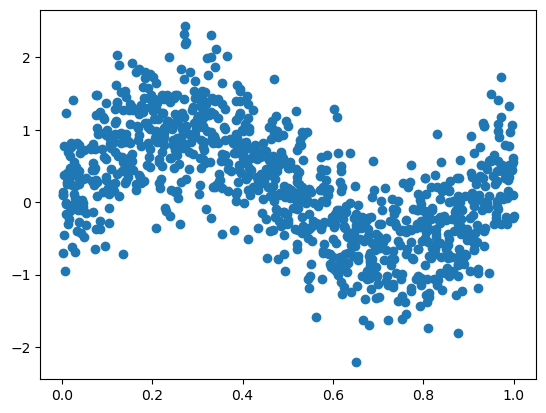

In [8]:
data_loc="https://raw.githubusercontent.com/dknife/ML/main/data/" 
df = pd.read_csv(data_loc+"nonlinear.csv")
X = df["x"].to_numpy()
y_label = df["y"].to_numpy()

plt.figure()
plt.scatter(X, y_label)
plt.show()

In [9]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(1,)),
    keras.layers.Dense(6, activation="sigmoid"),
    keras.layers.Dense(4, activation="sigmoid"),
    keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(learning_rate=0.2)
model.compile(optimizer = optimizer , loss = "mse")

ImportError: cannot import name 'Iterable' from 'collections' (C:\Users\carlo\anaconda3\envs\CW_AI\Lib\collections\__init__.py)

In [10]:
model.summary()

# 입력노드 1개에서 ->6  (가중치) 행렬 1행 6열 이니깐 1x6 이여서 6개 + b(편향) 은 노드개수만큼 그래서 6+6 =12 
# 6 -> 4  ==> 6x 4 => 24 + (편향 4개)
# 4 -> 1 (녚향 1개 = 출력층1개)

#전연결층(Fully_Connected_Layer(Fully Connected Network , FNC) 


NameError: name 'model' is not defined

In [ ]:
  x     ㆍ     U    =    H1
1000x1        1x6   = 1000 x 6

  H1    ㆍ     V    =    H2
1000x6        6x4     1000 x 4

  H2    ㆍ     W    =    Y
1000x4        4x1     1000 x 1

★★★★★
(앞에 1000개는 데이터 샘플의개수 이고 이게 데이터를 몇개를 통과해도 샘플의 개수는 변하지 않는다 그리고  서로다른샘플끼리 간섭하지않는다)

책 page:264 



그리서 위에서 
dense (Dense)                (None, 6)                 12 

None 이된거는 데이터를 모른다는 것 . 


In [11]:
model.fit(X , y_label , epochs = 500) #epochs 는 몇번 훈련을 반복할 것인지.  발산을 방지하기위해. 

NameError: name 'model' is not defined

In [ ]:
loss가 "nan"이 되는 것은 일반적으로 학습 중에 발생하는 문제입니다. 주로 다음과 같은 이유로 인해 발생할 수 있습니다:

학습 데이터에 결측치(nan 또는 null 값)가 포함되어 있는 경우: 학습 데이터에 결측치가 포함되어 있으면 loss 값이 "nan"이 될 수 있습니다. 
데이터를 확인하고 결측치를 처리해야 합니다.

학습 데이터의 스케일이 너무 크거나 작은 경우: 입력 데이터의 스케일이 매우 크거나 작으면 경사하강법 알고리즘이 수렴하지 않을 수 있습니다.
데이터를 표준화(스케일 조정)하는 것이 도움이 될 수 있습니다.

학습률(learning rate)이 너무 큰 경우: 학습률이 너무 크면 경사하강법이 발산하여 loss가 "nan"이 될 수 있습니다
. 학습률을 낮추어 보세요.

모델 구조나 하이퍼파라미터 설정이 잘못된 경우: 모델의 구조나 하이퍼파라미터 설정이 문제를 일으킬 수 있습니다.
층의 수, 각 층의 노드 수, 활성화 함수, 최적화 알고리즘 등을 조정하여 모델을 최적화해야 합니다.

데이터의 분포나 특성이 학습에 부적합한 경우: 데이터의 분포나 특성이 모델에 적합하지 않을 수 있습니다
. 데이터를 살펴보고 전처리를 통해 데이터를 조정하거나 추가적인 특성 공학을 수행해야 합니다.

In [11]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
domain = np.linspace(0,1,100).reshape(-1,1) #reshape -> None,1 로바꿔줌. -> 100,1 
y_hat = model.predict(domain)


plt.figure()
plt.scatter(X, y_label)
plt.scatter(domain , y_hat , color='r')
plt.show()

In [ ]:
y_hat

In [ ]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Model

inputs = Input(shape=(1,))
x = Dense(6, activation = 'sigmoid')(inputs) #많이씀
x = Dense(4, activation = 'sigmoid')(x)     #중간에 은닉된 애들 x 로 덮어써버림 .
outputs = Dense(1)(x)
model = Model(inputs = inputs , outputs = outputs)
#이방식을 더많이쓰는이유는 자유로움. 하나입력가지고 나눠줄수도 출력을 하나에 몰아줄수있음. 코드도 간단함. (코드가 지유도가 높을수록 해줘야하는게 많은데 간단함) 
#밑에랑 같은 코드임. 

model = keras.models.Sequential(
[
keras.layers.Input(shape=(1,)),
keras.layers.Dense(6, activation="sigmoid"),
keras.layers.Dense(4, activation="sigmoid"),
keras.layers.Dense(1)
])
optimizer = keras.optimizers.SGD(learning_rate=0.2)
model.compile(optimizer = optimizer , loss = "mse")
model.summary()


In [ ]:
고급 인공 신경망 구현

기울기 소실 (vanishing gradient)기울기 소거는 역전파 과정에서 신경망의 하위 계층으로 기울기가 전파될 때, 기울기가 점차적으로 작아지는 현상을 의미합니다
기울기 폭발 (exploding gradient)기울기 폭발은 역전파 과정에서 신경망의 하위 계층으로 기울기가 전파될 때, 기울기가 지수적으로 증가하는 현상을 의미합니다. 

세이비어 초기화 (Xavier initialization) 는 딥 러닝 모델에서 가중치를 초기화하는 방법 중 하나입니다. 이 초기화 방법은 효율적인 학습을 돕고, 
그래디언트 소실이나 폭발을 완화하여 학습의 안정성을 향상시킬 수 있습니다.

In [ ]:
#팁

은닉층은 ReLu  쓰면됨 
출력층은 회귀모델이면 활성화함수 안쓰면됨 (default linear모델)
        분류모델이면  이진분류 -> sigmoid   다중분류-> softmax         
    
이진분류일때 노드가 1 밖에없을떄 활성화함수를 sigmoid ( 0또는 1 사이가 나옴)
만약에 출력노드가 여러개다( 클래스가 3,4,5 개다 이면 ) -> softMax함수 를씀 -> 다중분류인경우 소프트맥스
    sigmoid를 쓰면 확률처럼나온다고 했는데 -> 다합친다고 100% 안나오는데 softMax를 쓰면 모든확률을 다 더했을때 딱 100프로로 나오게됨. 
    입력노드는 없어도 됨
    
이것이외에 다른걸 쓰면 값이 제한됨 